In [ ]:
# （参考）Google Driveにマウントして、ここからデータを読む場合
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import roc_auc_score
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas_profiling as pdp
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
import math
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew #for some statistics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline
import re


# Set Display Max Columns
pd.set_option("display.max_columns", 50)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#正規分布の確認
def check_norm(x):
    plt.hist(x, bins=100)#ヒストグラム表示
    plt.pause(.01)
    stats.probplot(x, dist="norm", plot=plt)#QQプロット表示
    plt.pause(.01)
    p=stats.shapiro(x)#シャピロウィルク検定
    print(p)

# yyplot 作成関数
def yyplot(y_obs, y_pred):
    yvalues = np.concatenate([y_obs, y_pred])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_obs, y_pred)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(10, 17)
    plt.ylim(10,17)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)

## RESIDENTIAL MODEL

In [ ]:
cd drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
train_df_res= pd.read_pickle("train_df_res_dum.pkl")
test_df_res= pd.read_pickle("test_df_res_dum.pkl")

In [ ]:
#train_df_res = train_df_res[train_df_res["SALEDATE_YEAR"] > 2000]

In [ ]:
train_df_res.head()

,QUADRANT_N,ASSESSMENT_NBHD,ROOM_AREA,BULD_AGE,FIREPLACES,LIV_DUR,LANDAREA,SALEDATE_YEAR,BL_RATIO,BATHRM_ALL,ROOM_ALL,YR_RMDL,AYB,EYB,RM_SALE,GBA,CNDTN,DISTANCE_LOC,DISTANCE_UN,DISTANCE_GP,DISTANCE_FN,DISTANCE_MC,DISTANCE_FW,DISTANCE_FB,DISTANCE_DC,GRADE,USECODE,STORIES,PRICE,AC_N,AC_Y,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,4,21,175.777778,116.0,3,116.0,2130,2001.0,1.485446,4,17,2003.479011,1900.0,1950,-2.479011,3164.0,2,2.811885,3.509274,2.738495,2.362502,2.779632,2.609083,3.053973,1.999729,4,24,3.0,140000.0,1,0,1,0,0,0,0,0,0,0
1,2,34,216.400000,116.0,2,116.0,1237,2001.0,1.749394,3,9,1960.000000,1900.0,1963,41.000000,2164.0,2,0.588203,1.355493,2.537999,4.191113,3.090060,4.059191,4.919885,4.667274,5,24,3.0,395000.0,1,0,0,0,0,0,0,1,0,0
2,4,13,124.000000,93.0,0,93.0,6380,2001.0,0.233229,2,11,2004.250785,1923.0,1964,-3.250785,1488.0,4,6.374310,7.488744,7.298494,7.206171,7.532929,7.457008,7.812170,6.782655,2,12,2.0,270000.0,1,0,0,0,0,1,0,0,0,0
3,4,21,187.000000,94.0,1,94.0,1737,2001.0,0.861255,2,7,2003.250785,1922.0,1954,-2.250785,1496.0,2,2.804958,4.945985,4.226314,3.632516,4.227949,3.902699,4.121868,3.132104,2,11,2.0,139900.0,0,1,1,0,0,0,0,0,0,0
4,2,23,142.500000,106.0,0,106.0,1800,2001.0,0.633333,2,7,2007.721852,1910.0,1967,-6.721852,1140.0,2,1.747084,2.778075,3.887960,5.486240,4.369229,5.323329,6.133502,6.000932,3,13,2.0,111000.0,1,0,0,0,0,0,0,1,0,0


In [ ]:
train_df_res.columns

Index(['QUADRANT_N', 'ASSESSMENT_NBHD', 'ROOM_AREA', 'BULD_AGE', 'FIREPLACES',
       'LIV_DUR', 'LANDAREA', 'SALEDATE_YEAR', 'BL_RATIO', 'BATHRM_ALL',
       'ROOM_ALL', 'YR_RMDL', 'AYB', 'EYB', 'RM_SALE', 'GBA', 'CNDTN',
       'DISTANCE_LOC', 'DISTANCE_UN', 'DISTANCE_GP', 'DISTANCE_FN',
       'DISTANCE_MC', 'DISTANCE_FW', 'DISTANCE_FB', 'DISTANCE_DC', 'GRADE',
       'USECODE', 'STORIES', 'PRICE', 'AC_N', 'AC_Y', 'WARD_Ward 1',
       'WARD_Ward 2', 'WARD_Ward 3', 'WARD_Ward 4', 'WARD_Ward 5',
       'WARD_Ward 6', 'WARD_Ward 7', 'WARD_Ward 8'],
      dtype='object')

In [ ]:
test_df_res.columns

Index(['QUADRANT_N', 'ASSESSMENT_NBHD', 'ROOM_AREA', 'BULD_AGE', 'FIREPLACES',
       'LIV_DUR', 'LANDAREA', 'SALEDATE_YEAR', 'BL_RATIO', 'BATHRM_ALL',
       'ROOM_ALL', 'YR_RMDL', 'AYB', 'EYB', 'RM_SALE', 'GBA', 'CNDTN',
       'DISTANCE_LOC', 'DISTANCE_UN', 'DISTANCE_GP', 'DISTANCE_FN',
       'DISTANCE_MC', 'DISTANCE_FW', 'DISTANCE_FB', 'DISTANCE_DC', 'GRADE',
       'USECODE', 'STORIES', 'Id', 'AC_N', 'AC_Y', 'WARD_Ward 1',
       'WARD_Ward 2', 'WARD_Ward 3', 'WARD_Ward 4', 'WARD_Ward 5',
       'WARD_Ward 6', 'WARD_Ward 7', 'WARD_Ward 8'],
      dtype='object')

In [ ]:
train_df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31074 entries, 0 to 31073
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUADRANT_N       31074 non-null  int64  
 1   ASSESSMENT_NBHD  31074 non-null  int64  
 2   ROOM_AREA        31074 non-null  float64
 3   BULD_AGE         31074 non-null  float64
 4   FIREPLACES       31074 non-null  int64  
 5   LIV_DUR          31074 non-null  float64
 6   LANDAREA         31074 non-null  int64  
 7   SALEDATE_YEAR    31074 non-null  float64
 8   BL_RATIO         31074 non-null  float64
 9   BATHRM_ALL       31074 non-null  int64  
 10  ROOM_ALL         31074 non-null  int64  
 11  YR_RMDL          31074 non-null  float64
 12  AYB              31074 non-null  float64
 13  EYB              31074 non-null  int64  
 14  RM_SALE          31074 non-null  float64
 15  GBA              31074 non-null  float64
 16  CNDTN            31074 non-null  int64  
 17  DISTANCE_LOC

In [ ]:
test_df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 0 to 4246
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUADRANT_N       4247 non-null   int64  
 1   ASSESSMENT_NBHD  4247 non-null   int64  
 2   ROOM_AREA        4247 non-null   float64
 3   BULD_AGE         4247 non-null   float64
 4   FIREPLACES       4247 non-null   int64  
 5   LIV_DUR          4247 non-null   float64
 6   LANDAREA         4247 non-null   int64  
 7   SALEDATE_YEAR    4247 non-null   float64
 8   BL_RATIO         4247 non-null   float64
 9   BATHRM_ALL       4247 non-null   int64  
 10  ROOM_ALL         4247 non-null   int64  
 11  YR_RMDL          4247 non-null   float64
 12  AYB              4247 non-null   float64
 13  EYB              4247 non-null   int64  
 14  RM_SALE          4247 non-null   float64
 15  GBA              4247 non-null   float64
 16  CNDTN            4247 non-null   int64  
 17  DISTANCE_LOC  

In [ ]:
train_df_res["PRICE"] = np.log(train_df_res["PRICE"])

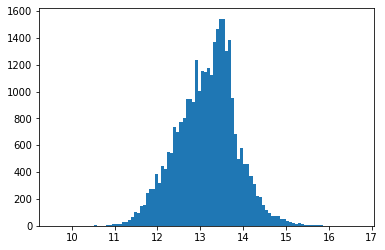

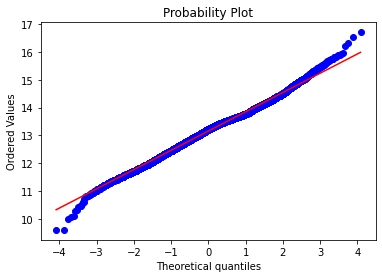

(0.9948503375053406, 5.906929172345304e-31)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
check_norm(train_df_res["PRICE"])

In [ ]:
train_y_r = train_df_res.PRICE.values
train_df_r = train_df_res.drop(columns={"PRICE"})

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb


In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
reg = make_pipeline(RobustScaler(),linear_model.LinearRegression())
ridge = make_pipeline(RobustScaler(),Ridge(random_state=0))
MLPreg = make_pipeline(RobustScaler(),MLPRegressor(random_state=1, max_iter=500, ))
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3,max_iter=2000))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_seed=9)

stacked_averaged_models = StackingAveragedModels(base_models = (ENet,ridge,model_xgb,model_lgb,GBoost),
                                                 meta_model = lasso)


In [ ]:
#Validation function
n_folds = 7

def rmsle_cv_r(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df_r.values)
    rmse= np.sqrt(-cross_val_score(model, train_df_r.values, train_y_r, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
models = [#reg,
          ridge,
          lasso,
          ENet,
          #model_xgb,
          model_lgb]
          #stacked_averaged_models]
          #averaged_models_res]

Names = [#"reg",
         "ridge",
         "lasso",
         "ENet",
         #"xgb",
         "lgb"]
         #"xgb"
         #"Stacked"]
         #Average"]

def scores():
    for model,Name in zip(models,Names):
        score = rmsle_cv_r(model)
        print(Name+ "_score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
    

In [ ]:
scores()

ridge_score: 0.2856 (0.1263)

lasso_score: 0.2862 (0.1260)

ENet_score: 0.2862 (0.1259)

lgb_score: 0.2269 (0.1101)



## CONDMINIUM MODEL

In [ ]:
train_df_cond = pd.read_pickle("train_df_cond_dum.pkl")
test_df_cond = pd.read_pickle("test_df_cond_dum.pkl")

In [ ]:
#train_df_cond = train_df_cond[train_df_cond["SALEDATE_YEAR"] > 2000]

In [ ]:
train_df_cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19824 entries, 0 to 19823
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUADRANT_N       19824 non-null  int64  
 1   BULD_AGE         19824 non-null  float64
 2   ROOM_AREA        19824 non-null  float64
 3   ASSESSMENT_NBHD  19824 non-null  int64  
 4   FIREPLACES       19824 non-null  int64  
 5   LIV_DUR          19824 non-null  float64
 6   BATHRM_ALL       19824 non-null  int64  
 7   ROOM_ALL         19824 non-null  int64  
 8   SALEDATE_YEAR    19824 non-null  float64
 9   BL_RATIO         19824 non-null  float64
 10  YR_RMDL          19824 non-null  float64
 11  AYB              19824 non-null  float64
 12  EYB              19824 non-null  int64  
 13  RM_SALE          19824 non-null  float64
 14  LIVING_GBA       19824 non-null  float64
 15  CMPLX_NUM        19824 non-null  float64
 16  DISTANCE_LOC     19824 non-null  float64
 17  DISTANCE_UN 

In [ ]:
test_df_cond.columns

Index(['QUADRANT_N', 'BULD_AGE', 'ROOM_AREA', 'ASSESSMENT_NBHD', 'FIREPLACES',
       'LIV_DUR', 'BATHRM_ALL', 'ROOM_ALL', 'SALEDATE_YEAR', 'BL_RATIO',
       'YR_RMDL', 'AYB', 'EYB', 'RM_SALE', 'LIVING_GBA', 'CMPLX_NUM',
       'DISTANCE_LOC', 'DISTANCE_UN', 'DISTANCE_GP', 'DISTANCE_FN',
       'DISTANCE_MC', 'DISTANCE_FW', 'DISTANCE_FB', 'DISTANCE_DC', 'LANDAREA',
       'Id', 'AC_N', 'AC_Y', 'WARD_Ward 1', 'WARD_Ward 2', 'WARD_Ward 3',
       'WARD_Ward 4', 'WARD_Ward 5', 'WARD_Ward 6', 'WARD_Ward 7',
       'WARD_Ward 8'],
      dtype='object')

In [ ]:
train_df_cond["PRICE"] = np.log(train_df_cond["PRICE"])

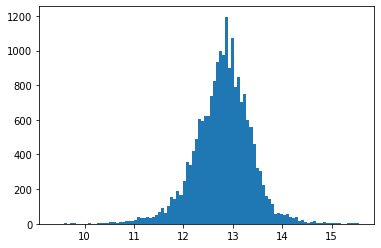

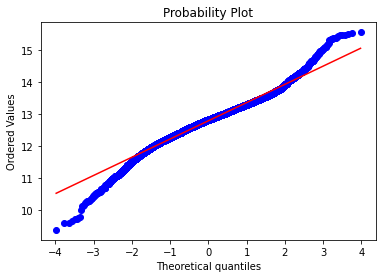

(0.9786067605018616, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
check_norm(train_df_cond["PRICE"])

In [ ]:
#train_df_cond["LIVING_GBA"] = np.log1p(train_df_cond["LIVING_GBA"])
#test_df_cond["LIVING_GBA"] = np.log1p(test_df_cond["LIVING_GBA"])
#check_norm(train_df_cond["LIVING_GBA"])

In [ ]:
train_y_c = train_df_cond.PRICE.values
train_df_c = train_df_cond.drop(columns={"PRICE"})

In [ ]:
#Validation function
n_folds = 7

def rmsle_cv_c(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df_c.values)
    rmse= np.sqrt(-cross_val_score(model, train_df_c.values, train_y_c, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

models = [#reg,
          ridge,
          lasso,
          ENet,
          #model_xgb,
          model_lgb]
          #stacked_averaged_models]
          #averaged_models_res]

Names = [#"reg",
         "ridge",
         "lasso",
         "ENet",
         #"xgb",
         "lgb"]
         #"xgb"
         #"Stacked"]
         #"Average"]

def scores():
    for model,Name in zip(models,Names):
        score = rmsle_cv_c(model)
        print(Name+ "_score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
    

In [ ]:
scores()

ridge_score: 0.2916 (0.1187)

lasso_score: 0.2916 (0.1192)

ENet_score: 0.2917 (0.1192)

lgb_score: 0.2333 (0.1412)



# TEST DATA PREDICT

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
set(train_df_c.columns)^set(test_df_cond.columns)

{'Id'}

In [ ]:
set(train_df_r.columns)^set(test_df_res.columns)

{'Id'}

In [ ]:
#model_res = model_lgb

In [ ]:
# res xgboost
#model_res.fit(train_df_r, train_y_r)
#res_pred_train = model_res.predict(train_df_r)
#res_pred_test = np.expm1(model_res.predict(test_df_res))
#print(rmsle(train_y_r, res_pred_train))

In [ ]:
model_res = model_xgb

In [ ]:
test_ID_res = test_df_res["Id"]
test_df_res = test_df_res.drop(columns={"Id"})

In [ ]:
# res xgboost
model_res.fit(train_df_r, train_y_r)
res_pred_train = model_res.predict(train_df_r)
res_pred_test_1 = np.exp(model_res.predict(test_df_res))
print(rmsle(train_y_r, res_pred_train))

[04:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.13650429551313303


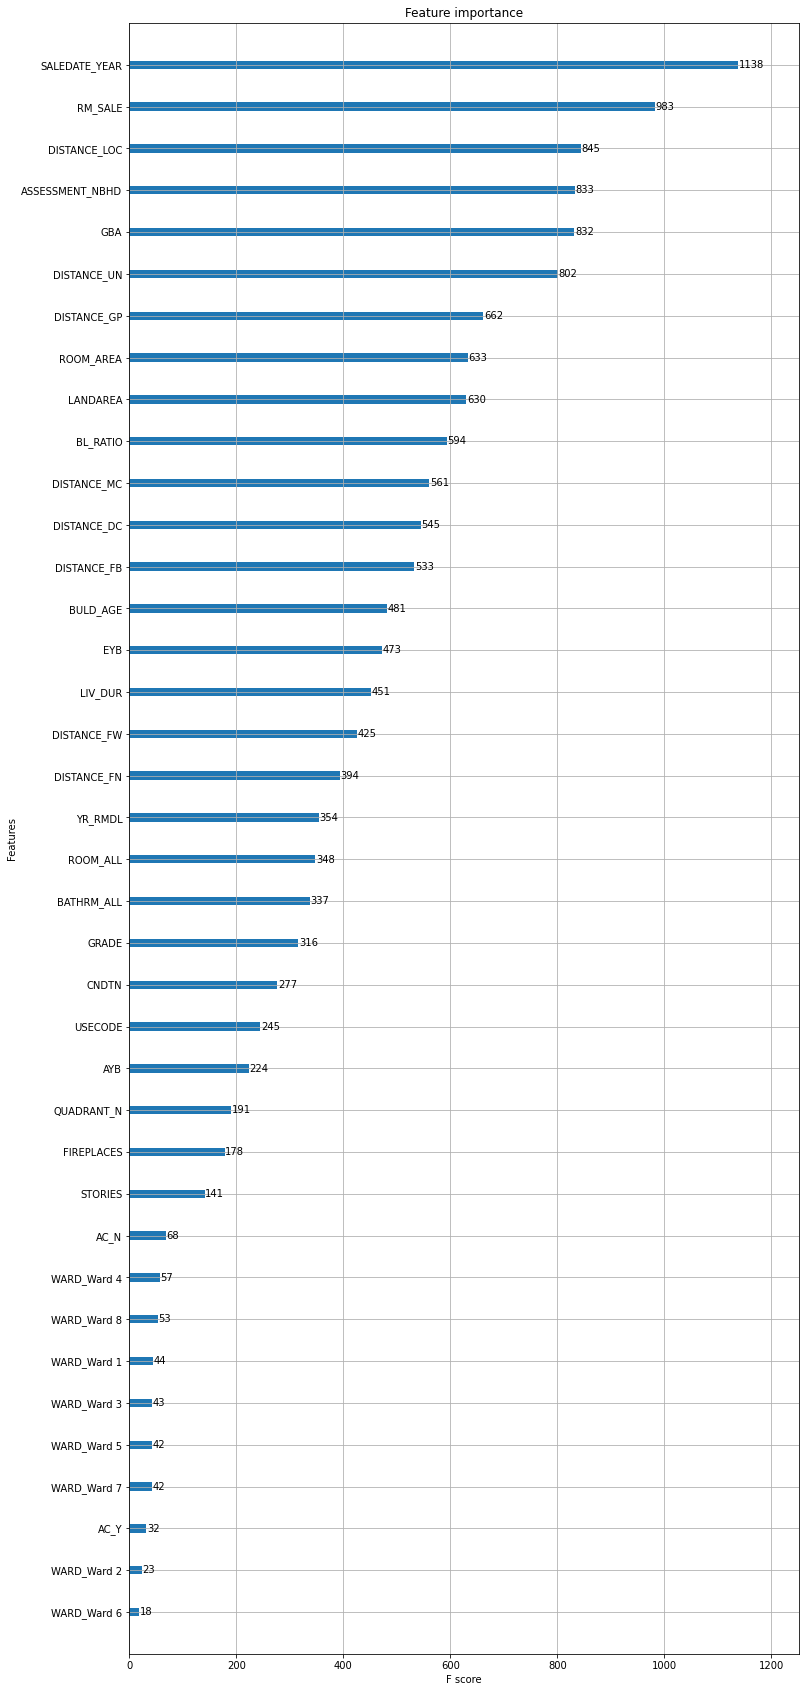

In [ ]:
_, ax = plt.subplots(figsize=(12, 30))
xgb.plot_importance(model_res,ax=ax)

In [ ]:
model_res = stacked_averaged_models

In [ ]:
# res xgboost
model_res.fit(train_df_r.values, train_y_r)
res_pred_train = model_res.predict(train_df_r.values)
res_pred_test_2 = np.exp(model_res.predict(test_df_res.values))
print(rmsle(train_y_r, res_pred_train))

[04:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:55:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.13882936205778676


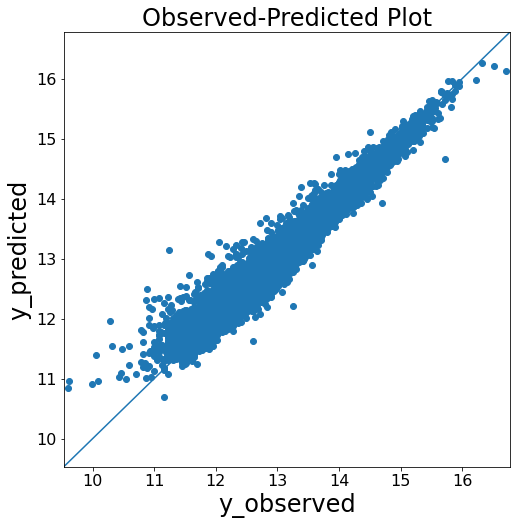

In [ ]:
yyplot(train_y_r,res_pred_train)

In [ ]:
model_cond = model_xgb

In [ ]:
test_ID_cond = test_df_cond["Id"]
test_df_cond = test_df_cond.drop(columns={"Id"})

In [ ]:
model_cond.fit(train_df_c, train_y_c)
cond_pred_train =model_cond.predict(train_df_c)
cond_pred_test_1 = np.exp(model_cond.predict(test_df_cond))
print(rmsle(train_y_c, cond_pred_train))

[05:00:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.13242357323389142


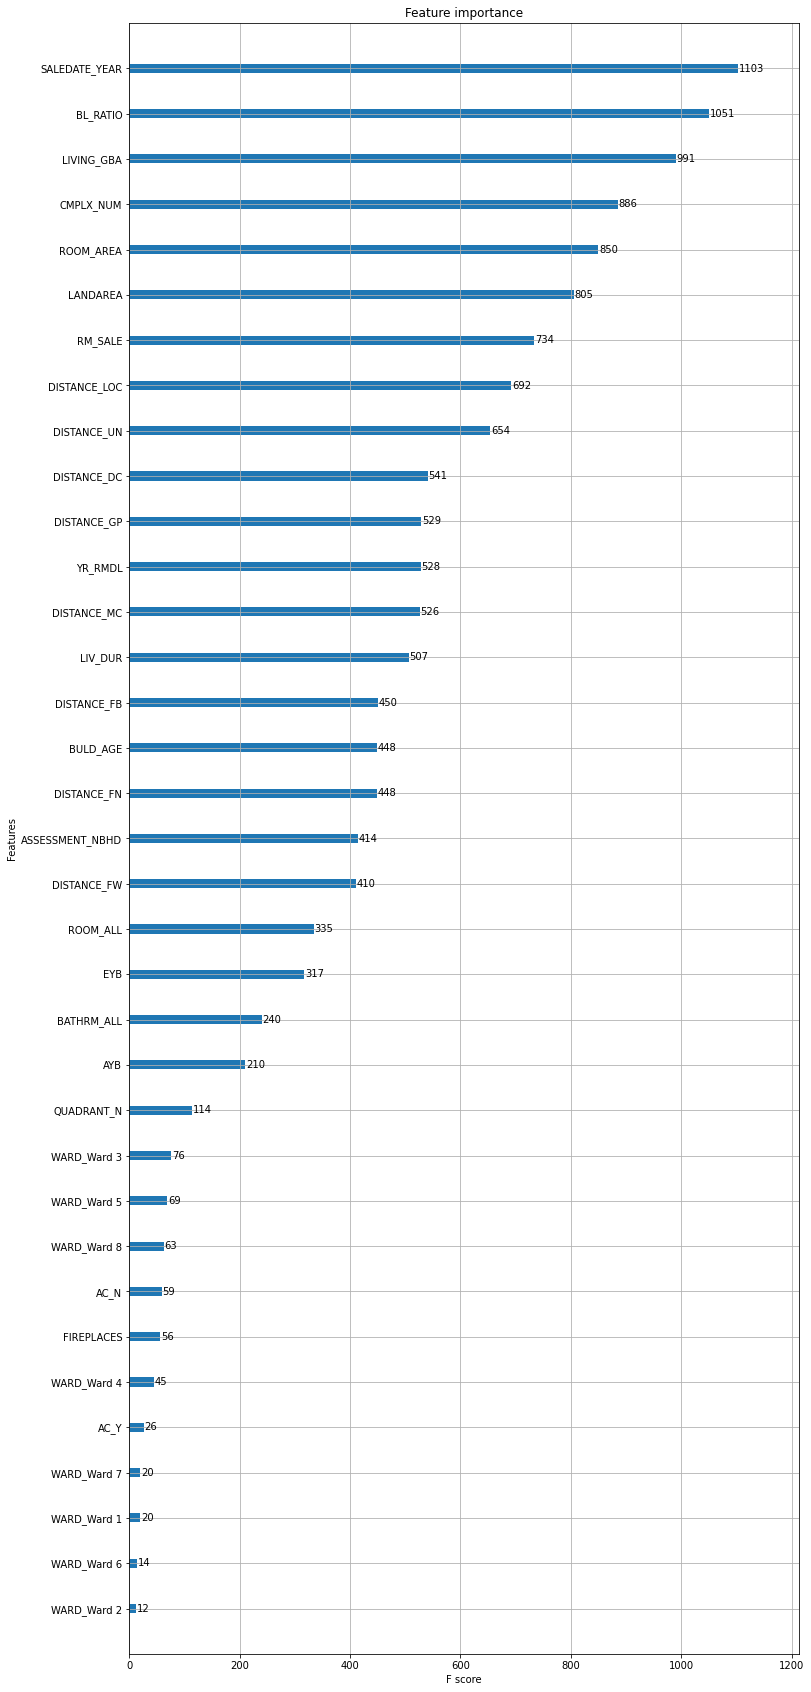

In [ ]:
_, ax = plt.subplots(figsize=(12, 30))
xgb.plot_importance(model_cond,ax=ax)

In [ ]:
model_cond = stacked_averaged_models

In [ ]:
# con lightgbm
model_cond.fit(train_df_c.values, train_y_c)
cond_pred_train =model_cond.predict(train_df_c.values)
cond_pred_test_2 = np.exp(model_cond.predict(test_df_cond.values))
print(rmsle(train_y_c, cond_pred_train))

[05:00:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.13240260948503957


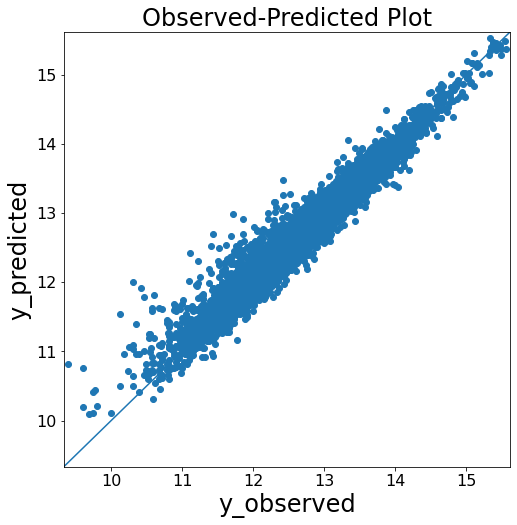

In [ ]:
yyplot(train_y_c,cond_pred_train)

In [ ]:
res_pred_test = 0.05*res_pred_test_2 + 0.95*res_pred_test_1 
cond_pred_test = 0.05*cond_pred_test_2+ 0.95*cond_pred_test_1 

# TEST DATA SUBMIT

In [ ]:
submit_r = pd.DataFrame()
submit_r['Id'] = test_ID_res
submit_r['PRICE'] = res_pred_test

In [ ]:
submit_c = pd.DataFrame()
submit_c['Id'] = test_ID_cond
submit_c['PRICE'] = cond_pred_test

In [ ]:
submit = pd.concat([submit_r,submit_c]).sort_index()

In [ ]:
submit

,Id,PRICE
0,82653,265372.906950
1,82654,505269.459203
1,82659,363908.053653
2,82660,216307.139473
2,82655,455854.670755
...,...,...
7481,92374,404704.058272
7482,92375,63292.823807
7484,92377,590486.485581
7485,92378,384958.681482


In [ ]:
submit.to_csv("submit_19.csv",index=0)